# Macs 30150  PSet 2 
## Part 1

In [23]:
import sympy as sy
import numpy as np
import math
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Problem 1

Text(0, 0.5, 'y')

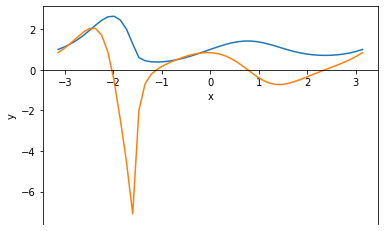

In [24]:
x = sy.symbols('x')
ex = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
f = sy.lambdify(x, ex, 'numpy')
f_dif = sy.lambdify(x, sy.diff(ex), 'numpy')
ax=plt.gca()
ax.spines['bottom'].set_position('zero')
a = np.linspace(-np.pi, np.pi)
b, c = f(a), f_dif(a)
plt.plot(a,b)
plt.plot(a,c)
plt.xlabel('x')
plt.ylabel('y')

### Problem 2

In [25]:
def ffw_1(f, x, h):
    return (f(x+h) - f(x))/h
def ffw_2(f, x, h):
    return (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
def fbw_1(f, x, h):
    return (f(x) - f(x-h))/h
def fbw_2(f, x, h):
    return (3*f(x) - 4*f(x-h) + f(x-2*h))/(2*h)
def fc_2(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)
def fc_4 (f, x, h):
    return (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))/(12*h)

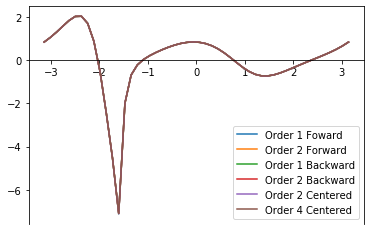

In [26]:
plt.plot(a,ffw_1(f,a,0.001))
plt.plot(a,ffw_2(f,a,0.001))
plt.plot(a,fbw_1(f,a,0.001))
plt.plot(a,fbw_2(f,a,0.001))
plt.plot(a,fc_2(f,a,0.001))
plt.plot(a,fc_4(f,a,0.001))
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.legend(['Order 1 Foward', "Order 2 Forward", "Order 1 Backward", \
            "Order 2 Backward", "Order 2 Centered", "Order 4 Centered"], loc = 'lower right')

### Problem 3

Text(0, 0.5, 'Absolute Error')

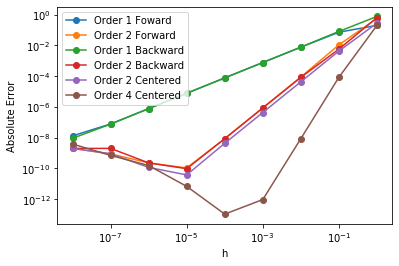

In [27]:
h = np.logspace(-8,0,9)
x = 1
h1 = abs(f_dif(x)-ffw_1(f,x,h))
h2 = abs(f_dif(x)-ffw_2(f,x,h))
h3 = abs(f_dif(x)-fbw_1(f,x,h))
h4 = abs(f_dif(x)-fbw_2(f,x,h))
h5 = abs(f_dif(x)-fc_2(f,x,h))
h6 = abs(f_dif(x)-fc_4(f,x,h))
plt.loglog(h,h1,marker = 'o')
plt.loglog(h,h2,marker = 'o')
plt.loglog(h,h3,marker = 'o')
plt.loglog(h,h4,marker = 'o')
plt.loglog(h,h5,marker = 'o')
plt.loglog(h,h6,marker = 'o')
plt.legend(['Order 1 Foward', "Order 2 Forward", "Order 1 Backward", \
            "Order 2 Backward", "Order 2 Centered", "Order 4 Centered"], loc = 'upper left')
plt.xlabel('h')
plt.ylabel('Absolute Error')

### Problem 4

In [28]:
import pandas as pd
df = pd.DataFrame(np.load('plane.npy'), columns = ['time', 'a', 'b'])
df['a'] = np.deg2rad(df['a'])
df['b'] = np.deg2rad(df['b'])
def x_cord(a,b):
    return 500*(np.tan(b))/(np.tan(b)-np.tan(a))
def y_cord(a,b):
    return 500*(np.tan(b)*np.tan(a))/(np.tan(b)-np.tan(a))
df['x'] = x_cord(df['a'],df['b'])
df['y'] = y_cord(df['a'],df['b'])
#time: 8 - 13
df['x_prime'] = (df.x.shift(-1)-df.x.shift(1))/2
df['y_prime'] = (df.y.shift(-1)-df.y.shift(1))/2
#time: 7
df['x_prime'][0] = df['x'][1]- df['x'][0]
df['y_prime'][0] = df['y'][1]- df['y'][0]
#time: 14
df['x_prime'][7] = df['x'][7]- df['x'][6]
df['y_prime'][7] = df['y'][7]- df['y'][6]
#calculate speed
df['speed'] = np.sqrt(df['x_prime']**2 + df['y_prime']**2)
df

,time,a,b,x,y,x_prime,y_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44.665140,12.658266,46.424201
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45.323531,12.444889,47.001039
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47.280265,12.863104,48.998805
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48.360976,13.083197,50.099442
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46.650974,12.475760,48.290351
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49.700516,13.739086,51.564559
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51.898569,14.636669,53.923034
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49.554711,14.074988,51.514801


### Question 5

In [29]:
def Jac(f, p, h):
    n = len(f)
    m = len(p)
    J = np.zeros((n, m))
    e = np.eye(m)
    for i, f_i in enumerate(f):
        for j, p_j in enumerate(p):
            fcn = sy.lambdify((x, y), f_i, 'numpy')
            x_1 = p_j - h * e[:,j]
            x_2 = p_j + h * e[:,j]
            J[i, j] = (fcn(x_2[0], x_2[1]) - fcn(x_1[0], x_1[1])) / (2 * h)
    return J

In [30]:
# Test
x = sy.Symbol('x')
y = sy.Symbol('y')
Jac([x ** 2, x ** 3-y], [1,1], 0.01)

array([[ 2.    ,  0.    ],
       [ 3.0001, -1.    ]])

### Question 7

In [31]:
import time
import random
from autograd import grad
from autograd import numpy as npy

g = lambda x: (npy.sin(x) + 1)**(npy.sin(npy.cos(x)))
g_grad = grad(g)
x = sy.symbols('x')
fx = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))

In [32]:
def TIME(N):
    err1 = np.ones(N,dtype='float') * 1e-18
    err2 = np.zeros(N,dtype='float')
    err3 = np.zeros(N,dtype='float')
    time1 = np.zeros(N,dtype='float')
    time2 = np.zeros(N,dtype='float')
    time3 = np.zeros(N,dtype='float')
    for i in range(N):
        # Step 1
        x0 = np.random.uniform()
        # Step 2
        start1 = time.clock()
        dfx = sy.diff(fx, x)
        f_sy = sy.lambdify(x, dfx) 
        num1 = f_sy(x0)
        end1 = time.clock()
        time1[i] = end1-start1
        # Step 3
        start2 = time.clock()
        num2 = fc_4(f, x0, h=0.0001)
        end2 = time.clock()
        time2[i] = end2-start2
        err2[i] = abs(num1 - num2)
        # Step 4
        start3 = time.clock()
        num3 = g_grad(x0)
        end3 = time.clock()
        time3[i] = end3-start3
        err3[i] = abs(num1 - num3)
        
    ax = plt.gca()
    ax.loglog(time1, err1,'o', label='Sympy')
    ax.loglog(time2, err2, 'o', label='Difference Quotient')
    ax.loglog(time3, err3, 'o', label='Autograd')
    plt.legend()
    plt.xlabel('Computation Time(seconds)')
    plt.ylabel('Absolute Error')
    return

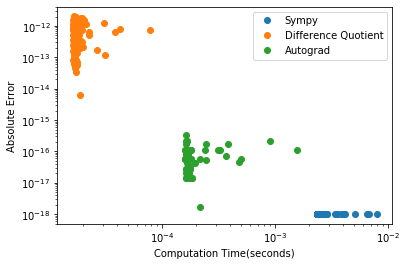

In [33]:
TIME(200)